***
<a id='beginning'></a> <!--\label{beginning}-->
* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [4. The Visibility space](4_0_introduction.ipynb)
    * Previous: [4.3 The 2-Element Interferometer](4_3_the_2-element_interferometer.ipynb)
    * Next: [4.5.1 UV Coverage: UV Tracks](4_5_1_uv_coverage_uv_tracks.ipynb)

***

Import standard modules:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML 
HTML('../style/course.css') #apply general CSS

Import section specific modules:

In [ ]:
HTML('../style/code_toggle.html')

***

## 4.4 可见度函数 The Visibility Function

到目前为止，我们已经讨论了  。由于天空在缓慢连续旋转，一条物理基线可以演化出不同的投影基线，对应到一系列的可见度函数$\mathcal{V}$上的采样。在一定条件下，我们可以看到可见度函数和天空亮度分布的傅里叶变换之间的关系。

So far, we've treated each individual measured visibility as a single measurement. Assuming a slowly and continuously rotating sky above the interferometer, we can turn the set of measured visibilities from different baselines into a set of samples of an underlying *continuous* visibility function $\mathcal{V}$. Under certain assumptions, we will see how this visibility function is related to the Fourier transform of the sky brightness distribution.

基于[$\S$ 4.3 &#10142;](4_3_the_2-element_interferometer.ipynb)的定义，我们现在聚焦到可见度函数，也就是通过干涉仪所看到的天空特征，该特征跟基线上的天线接收到的信号合成所产生的条纹图案的对比度有关。

Based on what we have defined in [$\S$ 4.3 &#10142;](4_3_the_2-element_interferometer.ipynb), we will focus on the visibility function, which is a caracteristic of the sky as seen through an interferometer. It is related to the contrast in the fringe pattern created by the combination of signals received by the antennas on each baseline.

### 4.4.1 复可见度的数学定义  Mathematical definition of the complex visibility


#### 4.4.1.1 Specific intensity / Surface brigthness

[$\S$ 1.2 &#10142;](../1_Radio_Science/1_2_electromagnetic_radiation_and_astronomical_quantities.ipynb)已经说到，特定强度$I_{\nu}$或者表面亮度用每单位立体角、单位频率间隔、单位接收面积所接收到的能量进行定义：

As seen in [$\S$ 1.2 &#10142;](../1_Radio_Science/1_2_electromagnetic_radiation_and_astronomical_quantities.ipynb), the *specific intensity* $I_\nu$ (or the *surface brightness*) is defined as the received power per unit solid angle, per unit frequency interval, per unit collecting area:
$$ dP_{\nu} = I_{\nu} d\Omega d\nu d A_{\text{eff}} $$

$dP_{\nu}$的单位为瓦特W，$I_{\nu}$的单位为W m$^{-2}$ sr$^{-1}$ Hz$^{-1}$。

where $dP_{\nu}$ is in units of W and $I_{\nu}$ is in units of W m$^{-2}$ sr$^{-1}$ Hz$^{-1}$.

流量密度$S$（单位立体角的流量密度为强度），带宽$\Delta \nu$，接收面$A$所接收到的能量$P_{\text{rec}}$为：

In the integrated form, the received power $P_{\text{rec}}$ from a source with flux density $S$ over the bandwidth $\Delta \nu$, flowing through a collecting area $A$ is:
$$P_{\text{rec}}=\frac{1}{2} A S \Delta \nu$$



带宽$\Delta \nu$、接收面积$A_{\text{eff}}$的接收机，接收到距离相位中心（$\mathbf{s_0}$）$\boldsymbol{\sigma}$，立体角$d\Omega$的天空能量为：

At a location $\boldsymbol{\sigma}$ from the phase center $\mathbf{s_0}$, the region of the sky defined by $d\Omega$ will contribute to the received power over bandwidth $\Delta \nu$ and collecting surface $A_{\text{eff}}$ as:
$$dP(\boldsymbol{\sigma})= \frac{1}{2} A_{\text{eff}}(\boldsymbol{\sigma})I_\nu(\boldsymbol{\sigma})\Delta\nu d\Omega$$

<span style="background-color:red">TLG:AC: Add image here which may help.</span>

<img src='figures/brightness.svg' width=40%>

<div class=advice>
<b>Recall the definitions:</b><br>

- Flux density : $S_{\nu} = \int I_{\nu} d\Omega$ in Jansky (Jy)<br> 
- Flux : F=$\int_{\Delta \nu} \int_\Omega I_\nu d \Omega d\nu$ in W m$^{-2}$<br>
- Received power:  P= $\int_{A_\text{eff}}\int_{\nu} \int_\Omega I_\nu d \Omega d\nu d A_{\text{eff}}$ in W<br>
where $\Omega$ is the solid angle subtended by the source in steradians (sr).
</div>

<div class=warn>
<b>Warning:</b> 真空中传播的信号的特定强度不会发生改变，独立于传播距离，然而，流量密度$S_{\nu}$跟距离和立体角相关。$I_{\nu}$The specific intensity $I_{\nu}$ does not vary while the signal propagates in vacuum, and is thus independent of the distance to the source. However, the flux density $S_{\nu}$ varies with the distance, with an $r^{-2}$ dependency.</div>


<div class=warn>
<b>Warning:</b> 系数$\frac{1}{2}$解释了多数天线馈源的极化（圆极化或者线性极化）事实，因此对于非极化源来说，只能接收到一半的能量。如果源存在跟天线方向一致的全极化，则天线可以测量到信号的整体能量。The $\frac{1}{2}$ coefficient accounts for the fact that most antenna feeds are polarized (either circularly or linearly) and therefore only sensitive to half of the power of an unpolarized source. If the source is fully polarised in the same direction as the antenna, the antenna will measure the full power.</div>

从前一节内容我们可以看到，干涉仪测到的是来自空中立体角$\Omega$范围内不同部分的亮度分布的和。通过空间滤波器（是一个投影基线函数）的滤波，以及天线响应（这里假定所有接收机都一样）的调制，我们得到了复可见度，它包括了亮度$I_\nu$的奇偶部分：

In the previous section, we have seen that the quantity measured by an interferometer is the sum of the contributions from different parts of the sky within the solid angle $\Omega$. The complex visibility includes the measurements of both the *odd* part and the *even* part of the specific intensity $I_\nu$, as seen through spatial filters (which are a function of the projected baseline) and modulated by the antenna response (assumed to be  identical for all receivers so far):

$$\boxed{\boxed{\mathcal{ V_{\mathbf{b}} } = \int_{\Omega} A_\text{eff}(\boldsymbol{\sigma})I_\nu(\boldsymbol{\sigma}) e^{-\imath 2\pi \frac{\textbf{b}\cdot \boldsymbol{\sigma}}{\lambda}} d\Omega}}$$

对有效面积进行归一化处理，得到可见度表达式，单位跟流量密度一样：

We will use an expression of the visibility where the effective area has been normalized, so that $\mathcal{V}_{\mathbf{b}}$ has dimensions of flux density:

<a id="vis:eq:441"></a> <!---\label{vis:eq:441}--->
$$\boxed{\boxed{\mathcal{ V_{\mathbf{b}} } = \int_{\Omega}I_\nu(\boldsymbol{\sigma}) e^{-\imath 2\pi \frac{\textbf{b}\cdot \boldsymbol{\sigma}}{\lambda}} d\Omega}} \text{ in Jy}$$

**Equation 4.4.1** 

#### 4.4.1.B Expression of the fringe pattern


[$\S$ 4.2 &#10142;](../4_Visibility_Space/4_2_the_baseline_and_its_representation_in_space.ipynb)定义了各种坐标系下的基线，下面我们将用到这些知识来明确表示可见度$\mathcal{V}_{\mathbf{b}}$。

In [$\S$ 4.2 &#10142;](../4_Visibility_Space/4_2_the_baseline_and_its_representation_in_space.ipynb), we defined various coordinates systems to represent the baseline in a sky-friendly reference frame. We will now use them to have an explicit expression of the visibility $\mathcal{V}_{\mathbf{b}}$.

$\boldsymbol{\sigma}$表示方向差矢量，$\boldsymbol{\sigma}= \mathbf{s} - \mathbf{s_0}$。

$\boldsymbol{\sigma}$ is the direction difference vector defined as $\boldsymbol{\sigma}= \mathbf{s} - \mathbf{s_0}$.

在($u$,$v$,$w$)坐标系里，$\mathbf{s_0}$的方向就是$w$的方向。

In ($u$,$v$,$w$)-coordinates, $\mathbf{s_0}$ defines the $w$ direction. 

<span style="background-color:red">TLG:AC: Make a reference to chapter 3 (the direction cosines and to 4.2 prec where the $uvw$ coordinates are defined.</span>

<span style="background-color:red">DH: 我把下面公式中的$\sigma$ 改成了$\mathbf{s}$ </span>

Therefore:

\begin{eqnarray}
\mathbf{s_0}&=&
\begin{pmatrix}
0 \\
0 \\
1 \\
\end{pmatrix}
\end{eqnarray}


\begin{eqnarray}
\mathbf{s}
&=&
\begin{pmatrix}
l \\
m \\
n \\
\end{pmatrix}
\end{eqnarray}

\begin{eqnarray}
\mathbf{b}_{\lambda} 
&=&
\mathbf{ \frac{\mathbf{b}}{\lambda}}
=
\begin{pmatrix}
u \\
v \\
w \\
\end{pmatrix}
\end{eqnarray}






点乘$\mathbf{b} \cdot \boldsymbol{\sigma}$可以表示为($u$,$v$,$w$) 和 ($l$,$m$,$n$)的函数：

The scalar product $\mathbf{b} \cdot \boldsymbol{\sigma}$ in  [Eq. 4.4.1 &#10549;](#vis:eq:441) can be expressed as a function of ($u$,$v$,$w$) and ($l$,$m$,$n$) as follows:


$$ \mathbf{b_\lambda} \cdot \boldsymbol{\sigma}= ul + vm + (n-1)w $$

天球上，$d \Omega = d\theta \sin \theta d\phi$ ，利用Jacobian行列式，换算到($l$,$m$,$n$)坐标系，我们得到以下式子：

We will now express $d\Omega$ from [Eq. 4.4.1 &#10549;](#vis:eq:441) in term of ($l$,$m$,$n$) coordinates. $d\Omega$ describes an element of solid angle on the celestial sphere.
As $d \Omega = d\theta \sin \theta d\phi$, we may also express the surface element in terms of ($l$,$m$,$n$). By using the Jacobian determinant, we end up with:

$$d \Omega = \frac{dl dm}{n} = \frac{dl dm}{\sqrt{1 - l^2 - m^2}}$$

<a id="vis:eq:442"></a> <!---\label{vis:eq:442}--->
$$\boxed{\boxed{\mathcal{ V }(u,v,w) = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty} A(l,m)I_\nu(l,m) \exp \left[ {-\imath 2\pi (ul+vm+w(\sqrt{1-l^2-m^2}-1)) }\right] \frac{dl dm}{\sqrt{1 - l^2 - m^2}}}}$$

**Equation 4.4.2** 

<span style="background-color:red">TLG:AC: Point to appendix for the proof.</span>

<div class=warn>
<b>Warning:</b> 积分的界限可以无限，但是被积函数是有界的，因为当$l^2+m^2 \geq 1$时，$A$ 和 $I_\nu$为空值。   The bounds of the integral can be infinite, since we know that the integrand is bounded ($A$ and $I_\nu$ are null when $l^2+m^2 \geq 1$).</div>

如果满足以下条件：
- 视场$\Omega$很小
- 波束$A(l,m)$很快减小到零
- 源距离相位中心($l=0$,$m=0$)很近
- $w$ 项很小

，即$l,m << 1$，则有


If the following conditions are met:

- the field of view $\Omega$ is small
- the beam pattern $A(l,m)$ goes quickly to zero
- the sources are grouped close to the phase center at ($l=0$,$m=0$)
- $w$ is small

i.e.  $l,m << 1$
then:

$w(\sqrt{1-l^2-m^2}-1) \sim -\frac{1}{2}(l^2+m^2)w$

<span style="background-color:red">TLG:AC: This is too vague. The proof of the above is important. How the above conditions lead to the above eq + how does it help us to get the result below?</span>

[Eq. 4.4.2 &#10549;](#vis:eq:442) now becomes:

<a id="vis:eq:443"></a> <!---\label{vis:eq:443}--->
$$ \mathcal{V}(u,v,w \sim 0) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \frac{A(l,m) I_\nu (l,m)}{\sqrt{1 - l^2 - m^2}}  e^{ -\imath 2\pi (ul+vm)}dl dm$$

**Equation 4.4.3** 

#### 4.4.1.3 Link with the Fourier Transform

公式[Eq. 4.4.3 &#10549;](#vis:eq:443)里已经没有了$w$项，呈现出$(u,v)$和$(l,m)$的 2-D 傅里叶变换对，其逆变换为：

The [Eq. 4.4.3 &#10549;](#vis:eq:443) is no longer a function of $w$, and it now takes the shape of a 2-D Fourier transform (see [$\S$ 2.4 &#10142;](../2_Mathematical_Groundwork/2_4_the_fourier_transform.ipynb)) with $(u,v)$ being the Fourier pairs of $(l,m)$.

The inverse transform can be written as:

$$ \frac{A(l,m) I_\nu(l,m)}{\sqrt{1 - l^2 - m^2}} = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \mathcal{V}(u,v) e^{ +\imath 2\pi (ul+vm)}du dv$$

$$ \mathcal{V}(u,v) \sim \mathscr{F} \{I_\nu \}(u,v) $$

We will come back to the consequences of this form in [$\S$ 4.6 &#10142;](../4_Visibility_Space/4_6_the_fourier_approximation_van_cittert-zernike_Theorem.ipynb)

<a id="vis:sec:442"></a> <!---\label{vis:sec:442}--->
### 4.4.2 理解可见度函数 Understanding the visibility function

####  4.4.2.1 可见度函数与天空亮度 Representations of the visibility function

$I_\nu$ 和 $\mathcal{V}$ 之间存在傅里叶关系，这一点很重要，因为$\mathcal{V}$可以通过干涉仪采样得到。干涉仪测量的不是天空本身，而是天空的傅里叶变换，因此要从$\mathcal{V}$中获取得到天空信息，需要我们理解可见度函数。简单来说，可以把可见度函数看成是连续复函数。

The Fourier relationship existing between $I_\nu$ and $\mathcal{V}$ is key, as it is the latter that is sampled by the interferometer. We remember that the interferometer is not sensitive to the sky but to the Fourier Transform of the sky.
To recover some knowledge of the sky through $\mathcal{V}$, one needs to understand the general shape of the visibility function.
We will treat it as a continuous complex function.

$\mathcal{V}$是傅里叶空间的二维函数。某个时间$t$某个频率$\nu$上，一条基线对应到$\mathbf{s_0}$方向确定的傅里叶空间的唯一($u$,$v$)点，即一个复可见度函数的采样。

$\mathcal{V}$ is a 2D function in Fourier space. At a time $t$ and frequency $\nu$, one baseline and one direction $\mathbf{s_0}$ will provide a unique ($u$,$v$) point in the fourier space, which corresponds to one sample of the complex visibility function.

早期的干涉仪，采样很少，不适合用于2D平面。通常把可见度功率表示成“uv距离”$r_{uv}$的函数：

In the earlier days of interferometry, only few samples where available and the inspection of the samples in a 2D plane was unpractical. We usually inspect the amplitude of the visibility samples as a function of the *uv distance* $r_{uv}$ defined:

$$ r_{uv} = \sqrt{u^2+v^2}$$

接下来，我们将针对一个简单实例进行简单的积分数值运算。 我们将在 [$\S$ 5.1 &#10142;](../5_Imaging/5_1_spatial_frequencies.ipynb) 进一步利用可见度函数和亮度分布之间的傅里叶关系进行成像处理。

Instead of exploiting the Fourier Transform properties linking the visibility function to the brightness distribution, we will simply compute this integral numerically on a simple case. The Fourier Transform will be more extensively used in [$\S$ 5.1 &#10142;](../5_Imaging/5_1_spatial_frequencies.ipynb) for imaging.

#### 4.4.2.2 积分与空间滤波   Interpretation of the integral as spatial filtering

可见度可以表示为亮度分布与复指数之积的积分，该复指数被称为“傅里叶核”。

The visibility is expressed as the integral of the product of the intensity distribution with a complex exponential which is called the *Fourier kernel*.

<font color=red>把强度分布矢量定义用作方向函数</font>，上面的积分可以理解成强度分布矢量$\mathbf{I_\nu}$跟傅里叶核$\mathbf{f}_{u,v}^{l,m}$的标量积：

Using a vector definition of the intensity distribution as a function of direction, this integral can be interpreted as the scalar product between the intensity distribution vector $\mathbf{I_\nu}$, and the Fourier basis kernel function $\mathbf{f}_{u,v}^{l,m}$:

$$ \mathcal{V}= \langle \mathbf{I_\nu} \cdot \mathbf{f}_{u,v}^{l,m}\rangle$$ with $\mathbf{f}_{u,v}^{l,m}= e^{-2j\pi (ul+vm)}$

这可以看成是$\mathbf{I_\nu}$在基向量$\mathbf{f}_{u,v}^{l,m}$上的投影。强度分布在频率($u$,$v$)的傅里叶基向量投影系数，就是相应基线的可见度，该运算过滤了空间频率($u$,$v$)处，强度分布中的幅度。

This can be seen as the projection of $\mathbf{I_\nu}$ on the basis vector $\mathbf{f}_{u,v}^{l,m}$. The complex visibility of the baseline with ($u$,$v$) coordinates, is therefore the coefficient of the intensity distribution projected on the  Fourier basis vector of frequency ($u$,$v$). This operation therefore filters the magnitude of spatial frequency ($u$,$v$) contained in the intensity distribution.

傅里叶矢量可以看成是投影在空中的条纹（[Fig. 4.4.1 &#10549;](#vis:fig:441)），从中可以看出天空的信息。

The Fourier vector can be seen as a fringe pattern projected on the sky ([Fig. 4.4.1 &#10549;](#vis:fig:441)), through which the content of the sky is seen.

<a id="vis:fig:441"></a> <!---\label{vis:fig:441}--->
<img src='figures/uvfreq.svg' width=30%>

**Figure 4.4.1**: 位于($u$,$v$)处的单个空间频率，及其所对应的天空上的条纹。 a single spatial frequency located at ($u$,$v$) and its associated fringe pattern on the sky.

把待测天空近似为一个平面，用一个二元干涉仪进行观测，用($u$, $v$, $w$)坐标系标识物理基线$\mathbf{b}$和投影基线$\mathbf{b_\text{proj}}$，用($l$, $m$, $n$)坐标系标识相位中心$\mathbf{s_0}$和观测方向$\mathbf{\sigma}$，然后在两者之间建立关系，如图([Fig. 4.4.2 &#10549;](#fvis:fig:442))。

For a 2-element interferometer, observing a sky which can be approximated as a plane, we can link the *physical* baseline $\mathbf{b}$, the *projected* baseline $\mathbf{b_\text{proj}}$ in the ($u$, $v$, $w$) frame, the *phase center* $\mathbf{s_0}$ and a direction of observation $\mathbf{\sigma}$ in the ($l$, $m$, $n$) frame with one another ([Fig. 4.4.2 &#10549;](#fvis:fig:442)).

<a id="vis:fig:442"></a> <!---\label{vis:fig:442}--->
<img src='figures/spatialfiltering.png' width=70%>

**Figure 4.4.2**: 投影基线、($u$,$v$,$w$)空间、($l$,$m$,$n$)空间之间的关系。Relationship between the projected baseline, the ($u$,$v$,$w$) space and the ($l$,$m$,$n$) space.

公式[Eq. 4.4.3 &#10549;](#vis:eq:443)，对于($u$,$v$,$w$)空间的单条投影基线，其可见度函数$\mathcal{V}(u,v,w)$的值是来自$\boldsymbol{\sigma}(l,m)$方向，视场范围内($dldm$)的强度分布之和。如果天空中的源具有复杂结构，可见度函数是一个($u$,$v$,$w$)函数，
变得比较难以理解。

From [Eq. 4.4.3 &#10549;](#vis:eq:443), for a single projected baseline with coordinates ($u$,$v$,$w$), the value of the visibility function $\mathcal{V}(u,v,w)$ is the sum of all contributions from the observed field of view ($dldm$) coming from the direction $\boldsymbol{\sigma}(l,m)$. If the sky is filled with sources with complex structures, the visibility function being a function of ($u$,$v$,$w$), can be hard for a human to interpret.

##### 4.4.2.3  可见度的应用：探测源的形状  Using the visibility: shape of the source

<font color=red>我认为第一段中，应该把沿$m$轴改为沿 $l$ 轴。</font>

考虑一个二元干涉仪，其投影基线为$u$,$v=0$,$w=0$，可能是一条东-西走向的基线（[$\S$  4.5.1 &#10142;](4_5_1_uv_coverage_uv_tracks.ipynb)），沿$m$轴方向有一系列的条纹（为了简化）。

Consider a 2-element interferometer projecting a baseline ($u$,$v=0$,$w=0$) associated with a set of fringes along the $m$ axis (for simplification). This is possible with an East-West baseline (see [$\S$  4.5.1 &#10142;](4_5_1_uv_coverage_uv_tracks.ipynb)). 

假定天空只有单个单位亮度的圆形扩展源，在该源过本地子午线的时刻，干涉仪将在相位中心对其进行观测。因为只有单个源，所以天线模式效应可以忽略，$w=0$。

We assume that the sky is only composed of a single extended source represented by a disk of unit brightness. For simplicity, this interferometer will observe this source at the phase center when the source is at transit.

We assume that this is the only source the interferometer sees in the sky, that the effect of the antenna pattern is negligible and that $w=0$.

积分公式[Eq. 4.4.3 &#10549;](#vis:eq:443)简化为只对源上的条纹图案进行计算：

The integral of [Eq. 4.4.3 &#10549;](#vis:eq:443) therefore reduces to computing the integral of the fringe pattern over the source:
$$ \mathcal{V} = \int_{\text{disk}} e^{-2j\pi ul}dl$$


In [9]:
# 1 East-West baseline observing a disk at the phase center
from matplotlib.patches import Circle
def plotfringe(u=4,rad=0.2):
    global radius
    radius=rad
    # preparing (l,m,n) space
    Npointsl=1001
    ll=np.linspace(-1.,1.,Npointsl)
    l,m=np.meshgrid(ll,ll)

    # Definition of the disk
    #radius=0.1234 # angular radius of the object in l,m coordinates

    # projected baseline length on the u axis
    #u=4

    # generate fringe pattern
    tabcos=np.real(np.exp(-2j*np.pi*u*l))

    # plotting the fringe pattern and the source
    pxrad=radius*Npointsl/2
    circle=Circle((500,500),pxrad,color='r',alpha=0.5,fill=True)
    fig,ax =plt.subplots(figsize=(6,6))
    im=plt.imshow(np.abs(tabcos),interpolation=None,cmap="winter")
    ax.add_patch(circle)
    #center=l[(Npoints-1)/2,(Npoints-1)/2]

    # Compute the absolute value of the integral of the fringe over the source
    w=np.where(np.sqrt(l**2+m**2) <= radius)
    integral=np.sum(tabcos[w])
    print("Integral="+str(integral))



Integral=12341.470568575238


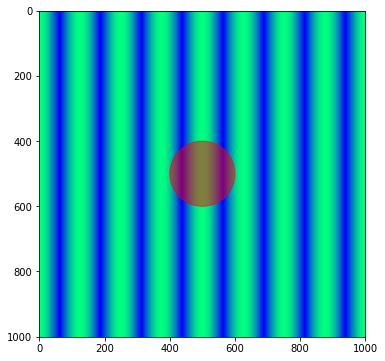

In [10]:
plotfringe(u=2,rad=0.2)

<a id="vis:fig:443"></a> <!---\label{vis:fig:443}--->
**Figure 4.4.3**: Sky composed of an extended source (red disk) as seen through a fringe pattern witch depends on the projected baseline with coordinate ($u$,0,0).

图[Fig. 4.4.3 &#10549;](#vis:fig:443)，叠加在条纹上的红色圆形代表源。显然，源所覆盖的亮纹数不为偶数，因此，积分结果为正。接下来，我们通过增大$u$值从而增大投影基线长度。

In [Fig. 4.4.3 &#10549;](#vis:fig:443), the source is represented by the red disk over which we superimposed the fringe pattern. We see that an uneven fraction of the bright fringes cross the source. In this case, the resulting integral is positive. Let's try to increase the projected baseline size by increasing the value of $u$.

Integral=-2140.96170232136


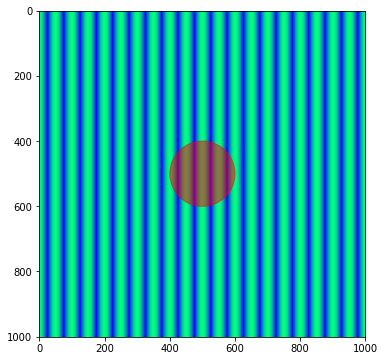

In [11]:
plotfringe(u=5,rad=0.2)

<a id="vis:fig:444"></a> <!---\label{vis:fig:444}--->
**Figure 4.4.4**: 投影基线长度增大到5，透过条纹看源。Same as in [Fig. 4.4.3 &#10549;](#vis:fig:443) seen through a different fringe pattern with a longer projected baseline.

图[Fig. 4.4.4 &#10549;](#fig:444)，积分的绝对值减小到之前的十分之一左右，意味着积分范围内的明暗条纹变得更平衡，但是结果为负数，说明暗条纹少占上风。

In [Fig. 4.4.4 &#10549;](#fig:444), the absolute value of the integral is $\sim$10 times lower than before, suggesting a more balanced contribution of dark and bright fringes to the integral (which is still slightly dominated by the dark fringes).

由此可以推断，随着条纹宽度变窄，积分结果最终会趋向为零，也就是说，积分范围内明暗条纹覆盖面相等的概率增加。

We can understand that, as the width of the fringes decreases, the integral will ultimately statistically converge towards 0. Indeed, the probability of evenly covering the source with the same fraction of bright and dark fringes increases.

让我们重点看一下随着$u$的增加，积分结果绝对值的变化。

Let's focus on the variation of the absolute value of the integral, as a function of increasing $u$.

In [11]:
def plotintegral(UMAX=15):
    %matplotlib inline
    global u
    from matplotlib.patches import Circle

    #UMAX=5. # adjust it to larger values if no zeroes is encountered in next plot

    Npointsl=1001
    Npointsu=500
    ll=np.linspace(-1.,1.,Npointsl)
    l,m=np.meshgrid(ll,ll)
    u=np.arange(Npointsu)*UMAX*1./Npointsu
    w=np.where(np.sqrt(l**2+m**2) <= radius)
    
    integral=np.array([])
    for du in u:
        tabcos=np.real(np.exp(2j*np.pi*du*l))
        integral=np.append(integral,np.abs(np.sum(tabcos[w])))

    normintegral=integral/np.max(integral)
    plt.xlabel('Spatial frequency u')
    plt.ylabel('Normalized integral over source')
    plt.plot(u,normintegral,".-")
    return normintegral


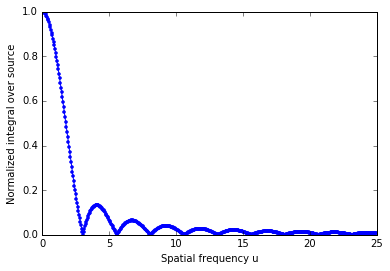

In [12]:
integral=plotintegral(UMAX=25.)

<a id="vis:fig:445"></a> <!---\label{vis:fig:445}--->
**Figure 4.4.5**: 源的积分结果随着空间频率$u$的变化而变化。  This plot represents the value of the integral over the source for varying values of the spatial frequency $u$.

图[Fig. 4.4.5 &#10549;](#vis:fig:445)，$u$从0增加到25，我们注意到，在一些$u$处，积分结果接近零，把这些点标记为$u_\text{min}^{(n)}$，这代表着，在这些点处，源在暗条纹上的积分跟其在亮条纹上的积分相等：

In [Fig. 4.4.5 &#10549;](#vis:fig:445), from $u=0$ to $u=25$, we can notice that the integral is close to zero at specific values of $u$ (denoted $u_\text{min}^{(n)}$). This corresponds to the fringe spacing where the integral of the source over the dark fringes is equal to the integral over the bright fringes:

$$ \int_{\text{bright }\cap\text{ source}} e^{-2j\pi ul}dl \approx \int_{\text{dark }\cap\text{ source}} e^{-2j\pi ul}dl$$

积分结果（也就是可见度函数）为空，对应着源上明条纹和暗条纹相当的情况，在这种情况下，我们说源是“可分辨resolved”的。第一个$u_\text{min}^{(1)}$，跟我们所观测的源的几何尺寸有着密切联系。

A null in the integral (i.e. of the visibility function) corresponds to the case where the contrast of the fringe (over the source) is zero. In this particular case, we say that the source is *resolved*.
The first value $u_\text{min}^{(1)}$, where the integral is minimum, is highly correlated with the geometry of the source we are observing.

让我们来确定一下$u_\text{min}^{(1)}$的近似值。

Let's determine an approximate value for $u_\text{min}^{(1)}$.

In [13]:
def findumin(normintegral,ulim=5):############
    # Adjust ulim to search for the first minimum of the integral
    # 
    #ulim=5 # should be an value larger than the first minimum
    wloc=np.where(u <= ulim)
    ############

    locmin=np.where(normintegral[0:wloc[0][-1]] == np.min(normintegral[0:wloc[0][-1]]))
    print("Index first minimum = "+str(locmin[0][0]))
    print("Normalized integral value at first min = "+str(normintegral[locmin][0]))
    print("Spatial frequency at first min = "+str(u[locmin][0]))

    umin=u[locmin][0]

    deltal=1.22/(2*umin) # Bessel function :  J1(3.83)=0=J1(2*pi*f*r)
    print
    print("Spatial scale at first min = "+str(deltal))
    print("True object radius = "+str(radius))

In [14]:
findumin(integral,ulim=5)

Index first minimum = 61
Normalized integral value at first min = 0.000554288516599
Spatial frequency at first min = 3.05

Spatial scale at first min = 0.2
True object radius = 0.2


在以上计算结果中，$u_\text{min}^{1}$=3.05。由于观测目标为圆形，因此其可见度函数可以用1阶贝塞尔函数$\mathcal{J}_1$表示，而$\mathcal{J}_1(2\pi u_\text{min}^{1} l)=\mathcal{J}_1(3.8317) \approx 0$，由以下过程可以推导出第一个空值所对应的 $l$的值：

We identified the value of $u_\text{min}^{1}$ to be 3.05.
As the object is a disk, its visibility function will be described by the first order Bessel function $\mathcal{J}_1$.
We know that $\mathcal{J}_1(2\pi u_\text{min}^{1} l)=\mathcal{J}_1(3.8317) \approx 0$.
We encounter a first null when:

\begin{eqnarray}
2 \pi u l &\approx& 3.8317 \\
l&\approx&\frac{1.22}{2 u_\text{min}^{1}} \\
l&\approx&0.2
\end{eqnarray}

推导出$l$=0.2，事实上，观测源的半径也正好是 0.2 ，估计出的结果非常完美。

Indeed, in this example, the *true* object radius in unit of $l$ was 0.2. Our answer is thus a pretty good estimate!

通过上面这个简单的例子，我们测得了目标的半径。如果有一个性能优良的系统，在短波长上，用相对较长的基线，在不成像的情况下，我们也有可能测量得到遥远星星的半径。

In this simple example, we were able to measure the radius of an object. If you were observing a remote star with a sufficiently good system and a relatively long baseline at a short wavelength, it would be possible to measure the radius of that star, without any imaging processing.

这个例子向我们解释了，干涉仪过去是如何通过信号合成，从低角分辨率仪器高分辨率地分辨出遥远的目标，即便到现在，基本原理也没有变化。

This example illustrates how interferometrists were (and still are!) able to resolve far-away objects with high angular resolution by combining the signals from low-angular resolution instruments.

详细参考见[<cite data-cite='1966raas.book.....K'>Kraus, $\S$6-27</cite> &#10548;](http://adsabs.harvard.edu/abs/1966raas.book.....K)和[<cite data-cite='1999ASPC..180.....T'>Taylor, $\S$ 16, p.338</cite> &#10548;](http://adsabs.harvard.edu/abs/1999ASPC..180.....T)。

See the following references for more details: [<cite data-cite='1966raas.book.....K'>Kraus, $\S$6-27</cite> &#10548;](http://adsabs.harvard.edu/abs/1966raas.book.....K)
and
[<cite data-cite='1999ASPC..180.....T'>Taylor, $\S$ 16, p.338</cite> &#10548;](http://adsabs.harvard.edu/abs/1999ASPC..180.....T).

接下来让我们利用可见度来进行定位。

Let's now use the visibility to determine the location of a source.

##### 4.4.2.4 可见度的应用：定位 Using the visibility: location of the source <a id="vis:sec:4424"></a> <!--\label{vis:sec:4424}--></a>

##### 4.4.2.4.1 未知赤经/赤纬的中天源  Transiting source of unknown RA/DEC

为了消除条纹的带宽效应（条纹被新格函数sinc调制），干涉仪设计了延迟$\tau$补偿，通过插入$\tau_c$ ，移动条纹的相位中心使得相位对齐。如果我们不进行任何条纹跟踪，而是把相位中心指向天顶，情况会怎么样呢？答案是，我们就此得到了一个中天测量干涉仪。

In order to reduce the bandwidth's impact on the fringe (recall that it causes the fringe pattern to be modulated by a sinc), the interferometer compensates for the delay $\tau$ by inserting a supplementary delay $\tau_c$ resulting in the shifting of the fringe pattern's phase center so that it coincides with the phase center. What happens if we remove do not implement any kind of fringe tracking and point the phase center towards the zenith? Well, we get a meridian transit interferometer.

本例中，假定未知赤经赤纬坐标的源为一个点源，我们将用干涉仪精确测量出该源的坐标。同时假定天线视场足够大，观测过程中不需要对天线指向做出大的调整。把天线指向地方子午线（$H=0^\text{h}$），中天干涉仪在空中投影出一个干涉条纹，当观测源通过干涉仪视场时，条纹会被波束调制。

For this example, we assume a single point source of unknown RA/DEC coordinates. We want to use the raw measurement of the interferometer to accurately determine its coordinates. We also assume that the field of view of the antenna elements is sufficiently large to vary smoothly accross the observation. We point the antennas toward the local meridian ($H=0^\text{h}$). The transit interferometer will project a fringe pattern on the sky. This fringe will be modulated by the *beam* as the source crosses the array's field of view.

天球上的源经过明暗条纹时，干涉仪响应会发生变化，该变化是LST的函数（见图[Fig. 4.4.6 &#10549;](#vis:fig:446)中的绿色）。

A source on the celestial sphere will cross the projected fringe pattern and will create a variation in the interferometer response as a function of the LST ([Fig. 4.4.6 &#10549;](#vis:fig:446) in green) as the source passes through bright and dark fringes.

<a id="vis:fig:446"></a> <!---\label{vis:fig:446}--->
<img src='figures/fringes.svg' width=50%>

**Figure 4.4.6**: 条纹率和中天时间的推导。 Derivation of the fringe rate and the transit time.

##### 4.4.2.4.2 赤经 $\alpha$估算  Estimating of the Right Ascension ($\alpha$)

如果能精确测得源过中天的时间，则可以确定出该源的赤经。可以根据条纹包络的最大值推算出中天时间

The Right Ascension can be determined if the transit time can be measured with high accuracy. The transit time can be derived from the maximum of the fringe enveloppe, which corresponds to the maximum elevation of the source multiplied by to the maximum antenna response of antennas pointing at the local meridian. <span style="background-color:red">TLG:RC: Please rewrite last sentence.</span><span style="background-color:red">EB:RC: I think that's what he meant? Not actually sure..</span>
The transit time correspond to the moment when the LST is equal to the RA (according to [$\S$ 3.2 &#10142;](../3_Positional_Astronomy/3_2_Hour_Angle.ipynb)). In our example, the RA is $\sim$$13^\text{h}07^\text{m}$.

##### 4.4.2.4.3 赤纬$\delta$估算 Estimating of the Declination ($\delta$)

根据条纹间距和条纹率，可以估算出赤纬。

To estimate the declination, we need to measure the fringe spacing and the fringe rate of the source using the rotation of the Earth.

- 我们定义条纹间距$\Delta l_f$为空中的角距离，对应于投影到空中的条纹图案的一个空间周期。这个间距可以由$\Delta l_f \sim \frac{\lambda}{|\mathbf{b}|}$估算出。本例子中，$\Delta l_f \sim \frac{1}{2864}\text{ rad}=0.02，\text{ rad}\approx1.14^\circ$。

- We define the *fringe spacing* $\Delta l_f$, the angular distance on the sky corresponding to one spatial period of the fringe pattern projected on the sky. This spacing is given by $\Delta l_f \sim \frac{\lambda}{|\mathbf{b}|}$. In our example, we had a $\frac{\lambda}{|\mathbf{b}|}$ of $\Delta l_f \sim \frac{1}{2864}\text{ rad}=0.02\text{ rad}\approx1.14^\circ$.

- 条纹率$\frac{d\phi}{d\theta}$表征的是当源穿过条纹的时候，发生在条纹上的振荡速率。接下来计算源穿过一个条纹所需要的时间。

- We define the *fringe rate* $\frac{d\phi}{d\theta}$ as the speed at which the fringe oscillates as the source crosses the fringe pattern. We will now deduce the time required by the source to cross one spatial period of the fringe pattern.

<span style="background-color:cyan">TLG:GM: Check if the italic words are in the glossary. </span>

图[Fig. 4.4.6 &#10549;](#vis:fig:446)，1h的观测时间内，大约经历了5个条纹周期，因此我们估计条纹间距约为$\sim$12分。

In [Fig. 4.4.6 &#10549;](#vis:fig:446), we estimate the fringe spacing to be $\sim$12 min ($\sim$ 5 periods are crossed in an 1h observation).

对于位于天赤道($\delta =0^\circ$)的源来说，每时会经历15$^\circ$，这会对应到一定数目的条纹，数出条纹数，就能得到源的坐标信息。

For a source located on the celestial equator ($\delta =0^\circ$), it will travel 15$^\circ$ per hour. This will correspond to a certain number of fringe spacings - counting them will thus give us information on the source's coordinates.

既然我们已经知道了条纹间距，就可以推算出赤道位置的条纹率$\frac{d\phi}{d\theta}\Bigr|_\text{eq}=\frac{\Delta l_f}{15^\circ \text{per h}} \approx 0.77 h \approx 4^\text{m}33^\text{s}$。

Since we know the fringe spacing, we can derive the fringe rate at the equator with $\frac{d\phi}{d\theta}\Bigr|_\text{eq}=\frac{\Delta l_f}{15^\circ \text{per h}} \approx 0.77 h \approx 4^\text{m}33^\text{s}$.

相反，靠近北天极($\delta \sim 90^\circ$)的源，条纹间距会很小。

Conversely, a source close to the NCP ($\delta \sim 90^\circ$) will have a very small fringe spacing and fringe rate.

拿图[4.4.6 &#10549;](#fig:436)中的条纹率跟赤道的条纹率做比较，我们就可以估算出源的赤纬。

To estimate the declination of the source, we need to compare the fringe rate at the equator to the fringe rate of the fringe pattern in Fig. [4.4.6 &#10549;](#fig:436).

$\cos \delta= \frac{d\phi}{d\theta}\Bigr|_\text{eq} /  \frac{d\phi}{d\theta}\Bigr|_\text{mes}=\frac{4^\text{m}33^\text{s}}{12^\text{m}}=0.3825 \leftrightarrow \delta \approx 67.7^\circ$.



#### 4.4.2.5 条纹率映射 Fringe rate mapping

一项被称为条纹率映射*fringe rate mapping*的技术（见[<cite data-cite='1996ASPC..101..175K'>Kogan, 1996</cite> &#10548;](http://adsabs.harvard.edu/full/1996ASPC..101..175K) and [<cite data-cite='1996ASPC..101..175K'>Walker, 1981</cite> &#10548;](http://adsabs.harvard.edu/full/1981AJ.....86.1323W)）利用了条纹率相对于相位中心的偏移信息。

A technique known as *fringe rate mapping* (see [<cite data-cite='1996ASPC..101..175K'>Kogan, 1996</cite> &#10548;](http://adsabs.harvard.edu/full/1996ASPC..101..175K) and [<cite data-cite='1996ASPC..101..175K'>Walker, 1981</cite> &#10548;](http://adsabs.harvard.edu/full/1981AJ.....86.1323W)) exploits the information of the fringe rate offset compared to that at the phase center.
<span style="background-color:cyan">TLG:GM: Check if the italic words are in the glossary. </span>

在一个二维参考系里，条纹率偏移定义为：

In a two-dimensional reference frame, the fringe rate offset can be defined as:

<a id="vis:eq:444"></a> <!---\label{vis:eq:444}--->
$$ \omega_{\text{frm}}= 2\pi (\frac{du}{dt}l+\frac{dv}{dt}m)$$

($u$,$v$)是投影极限坐标，($l$,$m$)是相位中心的方向余弦坐标。

where ($u$,$v$) are the coordinates of the projected baseline and ($l$,$m$) the direction cosine coordinates from the phase center.


设$m=f(l)$，公式[Eq. 4.4.4 &#10549;](#vis:eq:444)变成线性函数：$y=ax+b$。

By setting $m=f(l)$, [Eq. 4.4.4 &#10549;](#vis:eq:444) becomes a linear function: $y=ax+b$

每一条基线会产生一组不同间距和方向的天空条纹，从源的角度看过去，基线会发生旋转，这就带来的条纹的旋转，每个源会调制出跟相位中心距离相关的可见度。距离相位中心越远的源，对条纹率的贡献越快。

Each baseline produces a set of fringes on the sky with a different fringe spacing and orientation. This set of fringes rotates on the sky (due to the rotation of the baseline as seen from the source) and each source will modulate the visibility depending on its distance to the phase center. More distant sources will have a faster fringe rate contribution to the visibilities than sources close to the phase center.

##### 4.4.2.5.1 单一源 One source
如果空中只有一个位置未知的源，可见度幅度会产生一定条纹率的周期行为（见前例）。

If the sky is composed of only one source at an unknown position, the visibility amplitude will have a periodic behavior at a given fringe rate (see previous example).

假定源在空中的所有位点能产生相同的条纹率，如果我们能通过一条基线测出可见度的周期行为，这是一个时间函数（$\frac{du}{dt}$ and $\frac{dv}{dt}$），然后画出这条直线。

If we can measure the periodic behavior in the visibility plane as a function of time (i.e. measuring $\frac{du}{dt}$ and $\frac{dv}{dt}$), then we can draw the straight line $m=f(l)$, giving all possible loci in the sky where the source can produce the same observed fringe rate.

如果我们再有一条基线，测得另外一组随时间变化的可见度函数，得到另外一组参数($\frac{du}{dt}$,$\frac{dv}{dt}$)，再画出一条直线。

If we have a second baseline, and thus a different measure of variation of the visibility as a function of time, we can derive a different ($\frac{du}{dt}$,$\frac{dv}{dt}$) parameter. This will give us another straight line. 

这些线的相交处将给出源的位置。

The intersection of these lines will give the location of the source responsible for the variation of the two different baselines' measured amplitudes.

##### 4.4.2.5.2 多个源 Multiple sources

如果有多个亮源，就必须研究可见度变化谱，找出峰值分布，给出每个峰的$\frac{du}{dt}$ and$\frac{dv}{dt}$。对每个可见度随时间变化的函数进行FFT，就可以得到多条线。

If we have multiple bright sources, one must study the spectrum of the variation of the visibility and search for the various distribution of peaks (each giving values of $\frac{du}{dt}$ and$\frac{dv}{dt}$). By taking the FFT of each visibility as a function of time we can derive as many lines as we have detected peaks, per baseline.

最终，所有直线方程在$(l,m)$平面上产生多个交点，对应到视场中的多个主要源。值得注意的是，这里没有进行成像操作！

Ultimately, the collection of all straight line equations will produce intersections in the $(l,m)$ plane. These correspond to dominant sources in the field - without having to perform any imaging!

<div class=warn>
<b>Warning:</b> A lot of work can also be done using only the phase of the visibility. This is the main research topic for precise (and VLBI) astrometry. Keen readers are strongly encouraged to look up [<cite data-cite='2001isra.book.....T'>Thompson, Moran and Swenson, $\S$12, p.467</cite> &#10548;](http://adsabs.harvard.edu/abs/2001isra.book.....T).</div>

### 4.4.3 小结 Conclusion

描述了可见度函数的性质，接下来解决可见度函数采样的问题，我们将关注测得的($u$,$v$,$w$)频率随仪器和观测参数的变化。

Having described the properties of the visibility function, we will address the sampling of the visibility function. To this end, we will focus on the variation of our measured ($u$,$v$,$w$) frequencies as a function of instrumental and observational parameters.

我们已经展示了如何在3D参考系里表示一条基线，接下来讨论怎样把基线投影到2D平面。假定置身天球上，往下看基线分布，这时基线就被投影到了一个2D平面。后面的章节（ [$\S$ 4.6 &#10142;](4_6_the_fourier_approximation_van_cittert_zernike_theorem.ipynb)）会进一步讨论到，通过在基线可见度采样和天空之间的近似2D傅立叶变换，从而得到天空图像。这套理论中存在很多注意事项，会在适当时候讨论。目前，重点在于理解：对于天球上的给定点，3D基线可以投影到2D平面，随着地球的旋转（因为天球保持静止），每条基线的投影会发生改变。这种投影变化是射电干涉观测实践的关键，我们将在[$\S$ 4.5.1 &#10142;](4_5_1_uv_coverage_uv_tracks.ipynb)再次讨论到。

We have shown how a baseline can be expressed in a 3-D reference frame, and will next discuss how that baseline can be projected down to 2-D. Imagine being on the celestial sphere, looking down on to the baseline distribution. From this frame, the baselines look projected to a 2-D plane. Later in the chapter we will discuss the [$\S$ 4.6 &#10142;](4_6_the_fourier_approximation_van_cittert_zernike_theorem.ipynb) which allows us to construct an image of the sky from an approximate 2-D Fourier transform between the baseline visibility sampling and the sky. There are many caveats to this theorem, which will be discussed in good time. For now, the important thing to understand is: for a given point on the celestial sphere, the 3-D baselines can be projected onto a 2-D plane, and as the Earth rotates (and the Celestial sphere stays fixed), this changes the projection of each baseline. This change in projection is key to the practice of radio interferometric observation, and will come up again when we discuss [$\S$ 4.5.1 &#10142;](4_5_1_uv_coverage_uv_tracks.ipynb).

<p class=conclusion>
  <font size=4><b>Important things to remember</b></font>
  <br>
  
&bull; 可见度函数可以降维到2D的亮度分布傅立叶变换。The visibility function reduces to the <b>2D Fourier transform</b> of the intensity distribution under simplyfing assuptions.<br>
&bull; 对($u$,$v$)处的可见度进行积分，得到的是($u$,$v$)的空间频率系数。The visibility integral at ($u$,$v$) can be seen as an operator which returns the <b>coefficient of the spatial frequency</b> ($u$,$v$).<br>
&bull; 对积分进行研究，可以在不成像的情况推导出源的角尺寸和位置。 By studying the properties of this integral, one can derive the <b>angular size and position</b> of a source without imaging.
</p>

#### Format status:

* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : LF: 08/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : NC: 08/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : RF: 08/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : HF: 08/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : GM: 08/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : CC: 08/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : CL: 08/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : ST: 08/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : FN: 08/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : TC: 08/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : XX: 08/02/2017

***

* Next: [4.5.1 UV Coverage: UV Tracks](4_5_1_uv_coverage_uv_tracks.ipynb)